In [16]:
import pickle

# Load the augmented images and labels from the file
with open('../../local_data/data_useable_2.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [17]:
augmented_labels[:-105]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [18]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical

augmented_images = np.array(augmented_images, dtype=np.float32)
augmented_labels = np.array(augmented_labels, dtype=np.int32)
#augmented_labels = to_categorical(augmented_labels) #only use if the example above shows that the labels are not categorical yet e.g. [1. 0.](dont use) instead of 1(use)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1760, 512, 512, 3), (1760, 2), (440, 512, 512, 3), (440, 2))

In [21]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Normalization, Flatten
from tensorflow.keras.models import Model

base_model = tf.keras.applications.MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)

x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

C:\Users\juliu\AppData\Local\Temp\ipykernel_94052\831176042.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')


In [23]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath='../../models/pre_model_2_8.keras', monitor='val_loss', mode='min', save_best_only=True)]


history = model.fit(
  X_train,
  y_train, 
  epochs=15, 
  validation_data=(X_val, y_val),
  callbacks=callbacks
  )

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6224 - loss: 1.2293 - val_accuracy: 0.8000 - val_loss: 0.4340
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8600 - loss: 0.2968 - val_accuracy: 0.8591 - val_loss: 0.3515
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9572 - loss: 0.1227 - val_accuracy: 0.8091 - val_loss: 0.4843
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9896 - loss: 0.0503 - val_accuracy: 0.8659 - val_loss: 0.3677
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9937 - loss: 0.0315 - val_accuracy: 0.8614 - val_loss: 0.3845
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9983 - loss: 0.0130 - val_accuracy: 0.8659 - val_loss: 0.4110
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9956 - loss: 0.0119 - val_accuracy: 0.8750 - val_loss: 0.4345
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.8568 - v

KeyboardInterrupt: 

NameError: name 'history' is not defined

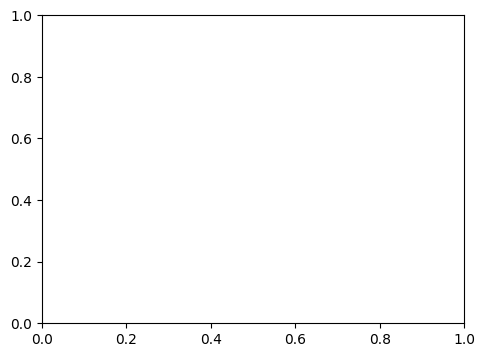

In [25]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [13]:
model.save('../../models/pre_model_2_8.h5')